In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

(x_train,t_train),(x_test,t_test)=mnist.load_data()

print('train shape=',x_train.shape,', train label shape=',t_train.shape)
print('test shape=',x_test.shape,', test label shape=',t_test.shape)

print('train label=',t_train) #학습 데이터 정답 출력
print('test label=',t_test) #데스트 데이터 정답 출력

train shape= (60000, 28, 28) , train label shape= (60000,)
test shape= (10000, 28, 28) , test label shape= (10000,)
train label= [5 0 4 ... 5 6 8]
test label= [7 2 1 ... 4 5 6]


In [2]:
#print(x_train[0])
print(t_train[0])
print(t_test[0])

5
7


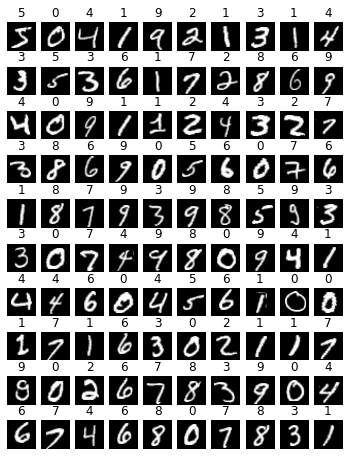

In [3]:
import matplotlib.pyplot as plt

#100개의 이미지 출력
plt.figure(figsize=(6,8))

for index in range(100): #100개 이미지 출력
    plt.subplot(10,10,index+1) #10행 10열
    plt.imshow(x_train[index], cmap='gray')
    plt.axis('off')
    plt.title(str(t_train[index]))
plt.show()

In [4]:
print(x_test[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 19

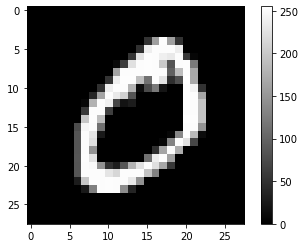

In [5]:
plt.imshow(x_train[1],cmap='gray')
plt.colorbar()
plt.show()

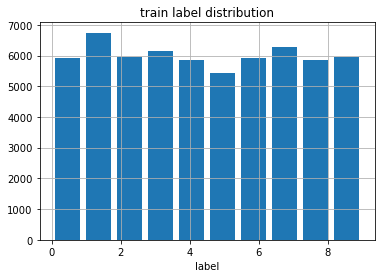

In [6]:
plt.title('train label distribution')
plt.grid()
plt.xlabel('label')
plt.hist(t_train,bins=10,rwidth=0.8)
plt.show()

In [7]:
#학습데이터 정답 분포 확인
label_distribution=np.zeros(10)

for idx in range(len(t_train)):
    label=int(t_train[idx])
    label_distribution[label]=label_distribution[label]+1
    
print(label_distribution)

[5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]


In [8]:
#학습 데이터/테스트 데이터 정규화(Normalization)
x_train=(x_train-0.0)/(255.0-0.0)
x_test=(x_test-0.0)/(255.0-0.0)

#정답 데이터 원핫 인코딩(One-Hot Encoding)
t_train=tf.keras.utils.to_categorical(t_train,num_classes=10) #5:[0,0,0,0,0,1,0,0,0,0]
t_test=tf.keras.utils.to_categorical(t_test,num_classes=10)

In [9]:
#print(x_train[0])
print(t_train[0])
print(t_test[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [24]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [26]:
hist=model.fit(x_train,t_train,epochs=30,validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3193 - accuracy: 0.9099 - val_loss: 0.1874 - val_accuracy: 0.9465
Epoch 2/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1483 - accuracy: 0.9578 - val_loss: 0.1401 - val_accuracy: 0.9597
Epoch 3/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1019 - accuracy: 0.9704 - val_loss: 0.1328 - val_accuracy: 0.9596
Epoch 4/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0770 - accuracy: 0.9770 - val_loss: 0.1162 - val_accuracy: 0.9669
Epoch 5/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0606 - accuracy: 0.9822 - val_loss: 0.1134 - val_accuracy: 0.9662
Epoch 6/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0483 - accuracy: 0.9854 - val_loss: 0.1071 - val_accuracy: 0.9696
Epoch 7/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0382 - accuracy: 0.9886 - val_loss: 0.1110 - val_accuracy:

In [27]:
model.evaluate(x_test,t_test)

313/313 [==============================] - 0s 946us/step - loss: 0.1299 - accuracy: 0.9762


[0.12993323802947998, 0.9761999845504761]

In [28]:
predictions=model.predict(x_test)

In [29]:
predictions[1]

array([7.9827706e-23, 5.0445721e-15, 1.0000000e+00, 4.8953500e-18,
       0.0000000e+00, 5.2627538e-18, 6.8753702e-20, 1.1125303e-28,
       2.3783463e-15, 1.1625846e-31], dtype=float32)

In [30]:
label=np.argmax(predictions[1])
label

2

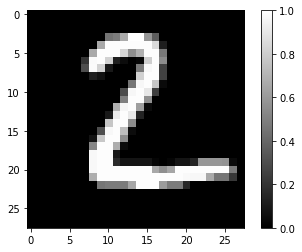

In [31]:
plt.imshow(x_test[1],cmap='gray')
plt.colorbar()
plt.show()

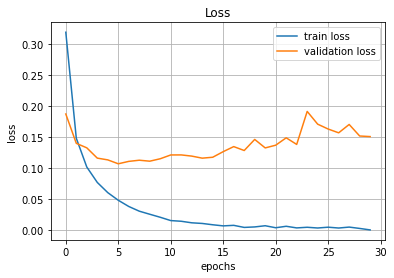

In [32]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'],label='validation loss')

plt.legend(loc='best')
plt.show()

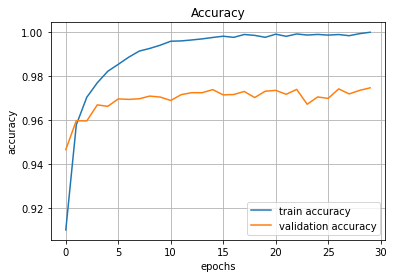

In [34]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'],label='train accuracy')
plt.plot(hist.history['val_accuracy'],label='validation accuracy')

plt.legend(loc='best')
plt.show()

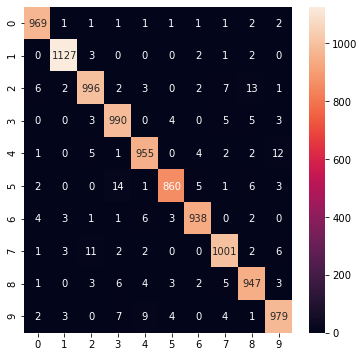

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6,6))

predicted_value=model.predict(x_test)

cm=confusion_matrix(np.argmax(t_test,axis=-1),np.argmax(predicted_value,axis=-1))

sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [38]:
print(cm)
print('\n')

for i in range(10):
    print(('label=%d\t(%d/%d)\taccuracy=%.3f')%
         (i,np.max(cm[i]),np.sum(cm[i]),
         np.max(cm[i])/np.sum(cm[i])))

[[ 969    1    1    1    1    1    1    1    2    2]
 [   0 1127    3    0    0    0    2    1    2    0]
 [   6    2  996    2    3    0    2    7   13    1]
 [   0    0    3  990    0    4    0    5    5    3]
 [   1    0    5    1  955    0    4    2    2   12]
 [   2    0    0   14    1  860    5    1    6    3]
 [   4    3    1    1    6    3  938    0    2    0]
 [   1    3   11    2    2    0    0 1001    2    6]
 [   1    0    3    6    4    3    2    5  947    3]
 [   2    3    0    7    9    4    0    4    1  979]]


label=0	(969/980)	accuracy=0.989
label=1	(1127/1135)	accuracy=0.993
label=2	(996/1032)	accuracy=0.965
label=3	(990/1010)	accuracy=0.980
label=4	(955/982)	accuracy=0.973
label=5	(860/892)	accuracy=0.964
label=6	(938/958)	accuracy=0.979
label=7	(1001/1028)	accuracy=0.974
label=8	(947/974)	accuracy=0.972
label=9	(979/1009)	accuracy=0.970


In [39]:
#정답, 예측 값 분포 확인
label_distribution=np.zeros(10)
prediction_distribution=np.zeros(10)

for idx in range(len(t_test)):
    label=int(np.argmax(t_test[idx]))
    label_distribution[label]=label_distribution[label]+1
    prediction=int(np.argmax(predicted_value[idx]))
    prediction_distribution[prediction]=prediction_distribution[prediction]+1
    
print(label_distribution)
print(prediction_distribution)

[ 980. 1135. 1032. 1010.  982.  892.  958. 1028.  974. 1009.]
[ 986. 1139. 1023. 1024.  981.  875.  954. 1027.  982. 1009.]
